## Fish

### NOTE: model detect edges when happen surprise change in pixel

## MASK : use to show the pattern  for object "Ground truth for any object

In [308]:
# import lib
import cv2
import numpy as np
import matplotlib.pyplot as plt

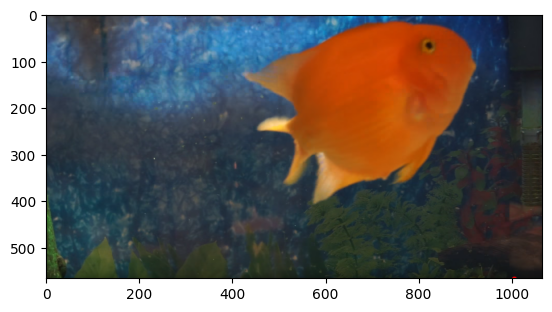

In [309]:
fish=cv2.imread('./data/fish.png')
plt.imshow(fish[:,:,::-1])

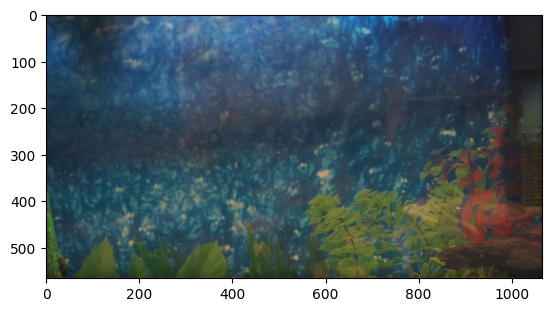

In [310]:
background=cv2.imread('./data/background.png')
plt.imshow(background[:,:,::-1])

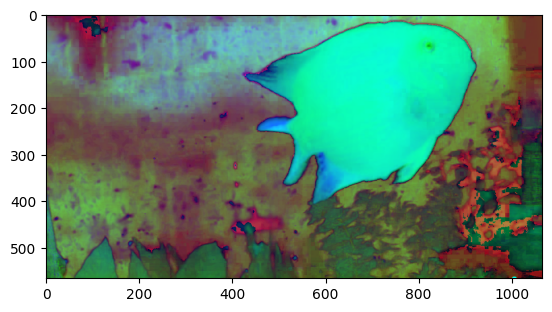

In [311]:
#BGR to HSV
fish_hsv=cv2.cvtColor(fish, cv2.COLOR_BGR2HSV)
plt.imshow(fish_hsv)

## creat mask for fish obj

In [312]:
mask = cv2.inRange(fish_hsv, (5, 75, 25), (25, 255, 255))
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [313]:
imask = mask > 0
orange = np.zeros_like(fish, np.uint8)
orange[imask] = fish[imask]

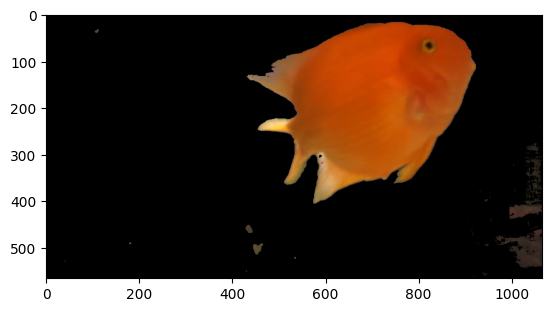

In [314]:
plt.imshow(orange[:,:,::-1])

## convert the color of fish to yalow

In [315]:
yellow_fish = fish.copy()
fish_hsv[...,0] = fish_hsv[...,0] -60
yellow_fish[imask] = cv2.cvtColor(fish_hsv, cv2.COLOR_HSV2BGR)[imask]

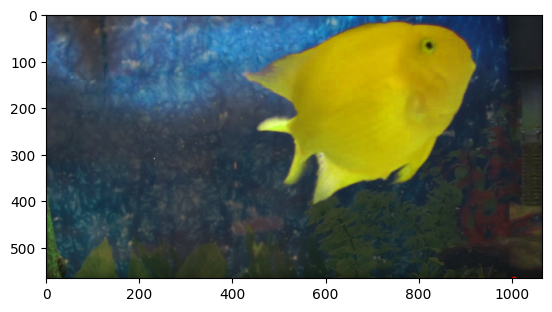

In [316]:
plt.imshow(yellow_fish[:,:,::-1])

In [317]:
## RED 
red_fish = fish.copy()
fish_hsv[...,0] = fish_hsv[...,0] -30
red_fish[imask] = cv2.cvtColor(fish_hsv, cv2.COLOR_HSV2BGR)[imask]

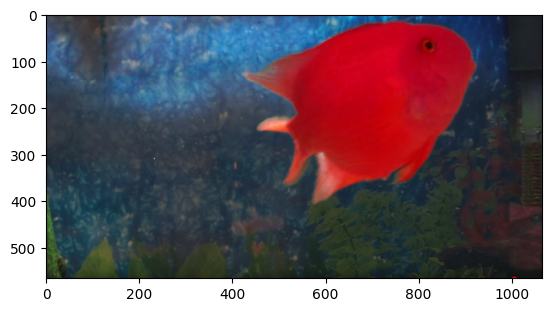

In [318]:
plt.imshow(red_fish[:,:,::-1])

## just fish and remove backgroung

In [319]:
backfish = cv2.bitwise_and(background, background, mask = (np.bitwise_not(imask)).astype(np.uint8))
no_fish = fish.copy()
no_fish = cv2.bitwise_and(no_fish, no_fish, mask = (np.bitwise_not(imask)).astype(np.uint8))
no_fish = no_fish + backfish

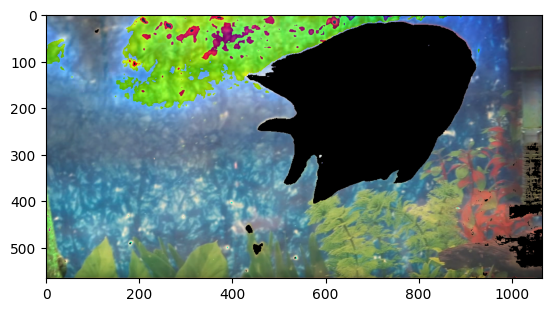

In [320]:
plt.imshow(no_fish[:,:,::-1])

## remove fish